In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras as ks
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv to bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [ ]:
data = pd.read_csv("BTCUSD_1min.csv")

In [ ]:
data.shape

(2283519, 8)

In [ ]:
data.isnull().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [ ]:
data['Symbol'].unique()

array(['BTCUSD'], dtype=object)

In [ ]:
import datetime

In [ ]:
import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
data.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,2.283519e+06,2.283519e+06,2.283519e+06,2.283519e+06,2.283519e+06,2.283519e+06
mean,5.289278e+11,4.736700e+03,4.738834e+03,4.734627e+03,4.736704e+03,2.633344e+00
std,7.379146e+11,3.933689e+03,3.936325e+03,3.931061e+03,3.933689e+03,2.121513e+01
min,1.444312e+09,0.000000e+00,2.425000e+02,0.000000e+00,2.360000e+02,0.000000e+00
25%,1.478564e+09,7.176300e+02,7.176500e+02,7.176300e+02,7.176300e+02,0.000000e+00
50%,1.512817e+09,4.012380e+03,4.013270e+03,4.011690e+03,4.012390e+03,2.014884e-02
75%,1.549232e+12,7.838370e+03,7.843510e+03,7.834005e+03,7.838390e+03,1.000000e+00
max,1.586390e+12,1.999900e+04,1.999900e+04,1.999070e+04,1.999900e+04,8.264463e+03


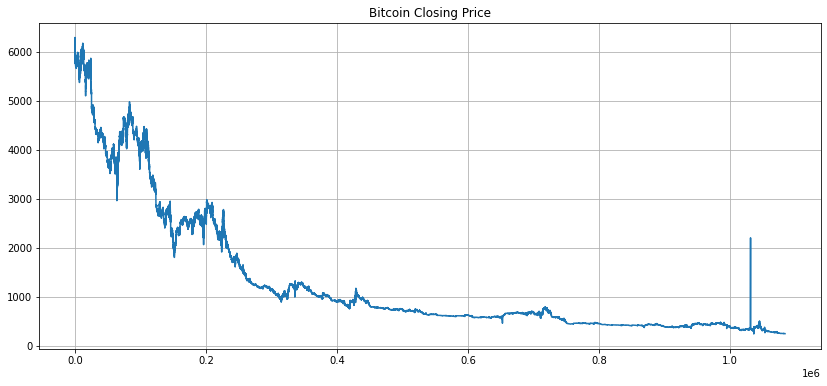

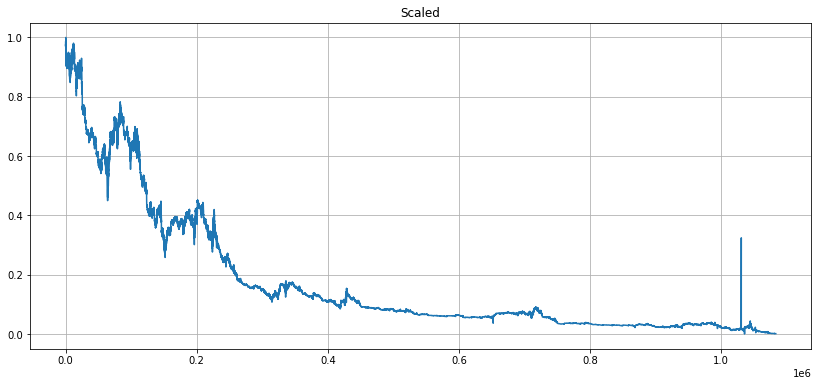

In [ ]:
a = data["Close"][1200000:]
close_price = np.array(a).reshape(-1,1)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [ ]:
X = []
y = []
for i in range(60, len(close_priceSC)):
    X.append(close_priceSC[i-60:i, 0])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)

(1083459, 60) (1083459,)


In [ ]:
X_train = X[:700000,:]
X_test = X[700000:,:]

y_train = y[:700000]
y_test = y[700000:]

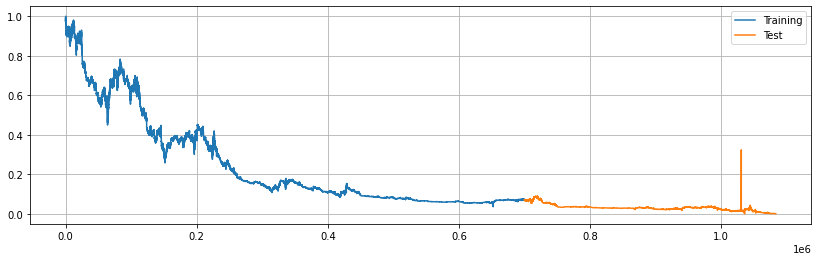

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(range(700000),y_train)
plt.plot(range(700000, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [ ]:
X_train = X_train.reshape(-1,60,1)
X_test = X_test.reshape(-1,60,1)

In [ ]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=1, batch_size=500)

1400/1400 [==============================] - 956s 679ms/step - loss: 0.0323
CPU times: user 26min 22s, sys: 1min 49s, total: 28min 12s
Wall time: 15min 57s


In [ ]:
y_pred = regressor.predict(X_test)
MSE = mean_absolute_error(y_test, y_pred)


Text(0, 0.5, 'Price')

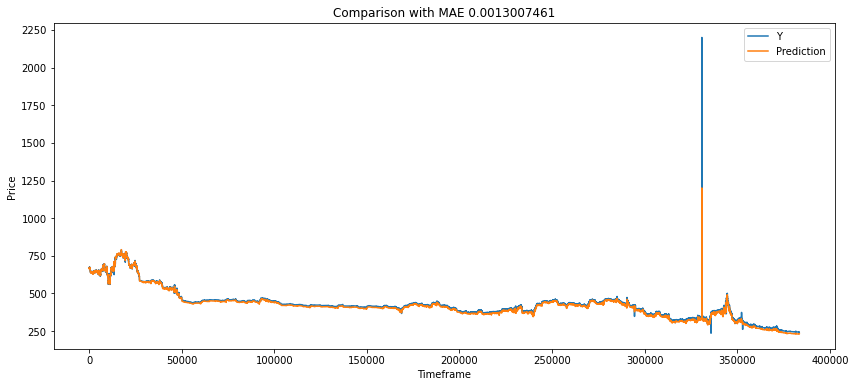

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(sc.inverse_transform(y_test.reshape(-1,1)))
plt.plot(sc.inverse_transform(y_pred.reshape(-1,1)))
plt.title("Comparison with MAE {0:0.10f}".format(MSE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [ ]:
import keras as ks
import tensorflow as tf
# Part 2 - Building the ANN


# Initializing the ANN

ann = tf.keras.models.Sequential()

In [ ]:
# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
# Adding the output layer

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Part 3 - Training the ANN


# Compiling the ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training the ANN on the Training set

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
21875/21875 [==============================] - 29s 1ms/step - loss: 0.4464 - accuracy: 7.3358e-07
Epoch 2/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4270 - accuracy: 7.8955e-07
Epoch 3/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4269 - accuracy: 1.6824e-06
Epoch 4/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4265 - accuracy: 8.6780e-07
Epoch 5/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4269 - accuracy: 1.7978e-07
Epoch 6/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4269 - accuracy: 2.1112e-06
Epoch 7/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4268 - accuracy: 1.8147e-06
Epoch 8/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4262 - accuracy: 5.9465e-07
Epoch 9/100
21875/21875 [==============================] - 28s 1ms/step - loss: 0.4268 - accuracy: 6.4080e-06
Epoch 10/1

In [ ]:
y_pred = ann.predict(X_test)

y_pred = (y_pred > 0.5)

In [ ]:
data

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7348.47,7350.41,7.733528
1,1586390340000,2020-04-08 23:59:00,BTCUSD,7364.37,7369.60,7364.37,7369.60,1.310954
2,1586390280000,2020-04-08 23:58:00,BTCUSD,7360.89,7367.18,7360.89,7364.37,1.018774
3,1586390220000,2020-04-08 23:57:00,BTCUSD,7357.62,7366.12,7357.62,7360.89,0.026251
4,1586390160000,2020-04-08 23:56:00,BTCUSD,7370.71,7370.71,7357.62,7357.62,0.444867
...,...,...,...,...,...,...,...,...
2283514,1444311840,2015-10-08 13:44:00,BTCUSD,242.96,242.96,242.96,242.96,0.033491
2283515,1444311780,2015-10-08 13:43:00,BTCUSD,242.95,242.96,242.95,242.96,0.010000
2283516,1444311720,2015-10-08 13:42:00,BTCUSD,242.95,242.95,242.95,242.95,0.000000
2283517,1444311660,2015-10-08 13:41:00,BTCUSD,242.50,242.95,242.50,242.95,0.001000


In [ ]:
data2 = data.copy()

In [ ]:
# Unix-time to 
data2['Unix Timestamp'] = pd.to_datetime(data2['Unix Timestamp'])

In [ ]:
# Resampling to daily frequency
data.index = data['Unix Timestamp']
data = data.resample('D').mean()

# Resampling to monthly frequency
data_month = data.resample('M').mean()

# Resampling to annual frequency
data_year = data.resample('A-DEC').mean()

# Resampling to quarterly frequency
data_Q = data.resample('Q-DEC').mean()

In [ ]:
data

,Open,High,Low,Close,Volume
Unix Timestamp,,,,,
1970-01-01,4736.699818,4738.833634,4734.626731,4736.704418,2.633344


In [ ]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(data.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 1080x504 with 0 Axes>